In [60]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = 'data/',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 32
)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
len(train_set)

60000

In [5]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [7]:
sample = next(iter(train_set))

In [8]:
len(sample)

2

In [9]:
type(sample)

tuple

In [10]:
image, label = sample

In [11]:
image.shape

torch.Size([1, 28, 28])

label:  9


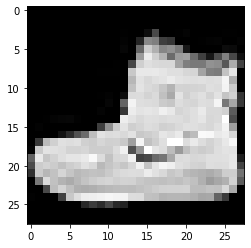

In [12]:
plt.imshow(image.squeeze(), cmap = 'gray')
print('label: ', label)

In [13]:
batch = next(iter(train_loader))

In [14]:
len(batch)

2

In [15]:
type(batch)

list

In [16]:
images, labels = batch

In [17]:
images.shape

torch.Size([32, 1, 28, 28])

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

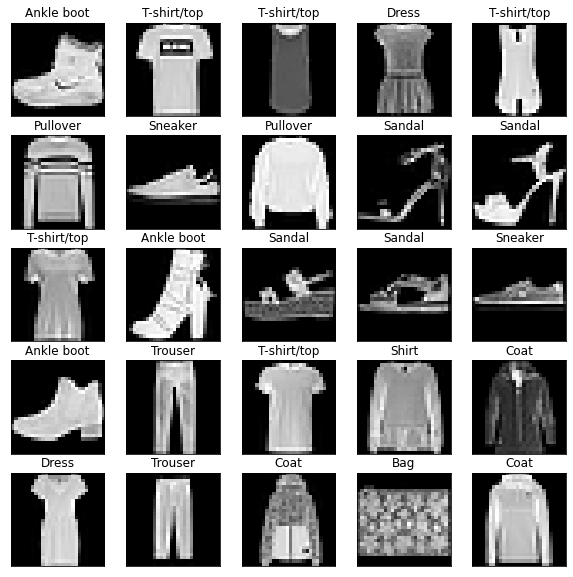

In [23]:
fig = plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].squeeze(), cmap = 'gray')
    plt.title(class_names[labels[i]])
plt.show()

In [65]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__ ()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features= 60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, 2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, 2)
        
        t = F.relu(self.fc1(t.reshape(-1, 12*4*4)))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        
        return t
        

In [66]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [70]:
import torch.optim as optim

epochs = 10
optimizer = optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(epochs):
    for data in train_loader:
        x, y = data
        model.zero_grad()
        output = model(x.view(-1, 1, 28, 28))
        loss = nn.MSELoss(output, y)
        loss.backward()
        optimizer.step()
        
    print(loss)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [64]:
images.shape

torch.Size([32, 1, 28, 28])

In [41]:
X

NameError: name 'X' is not defined

In [43]:
for data in train_loader:
    X, y = data
    print(X.shape)
    break

torch.Size([32, 1, 28, 28])


In [69]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'Identity',
 'InstanceNorm1d',
 'InstanceNorm2d',
 'Inst